In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import os
import pdb
from astropy.visualization import make_lupton_rgb
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Ellipse

In [3]:
def createRGB(b_im, g_im, r_im, stretch=1, Q=10, scale=None):
    """
    Create an RGB color composite image.
    
    Parameters
    ----------
    image : `MultibandImage`
        `MultibandImage` to display.
    bgr : sequence
        A 3-element sequence of filter names (i.e. keys of the exps dict) indicating what band
        to use for each channel. If `image` only has three filters then this parameter is ignored
        and the filters in the image are used.
    stretch: int
        The linear stretch of the image.
    Q: int
        The Asinh softening parameter.
    scale: list of 3 floats, each less than 1. (default: None)
        Re-scales rgb channels  
        
    Returns
    -------
    rgb: ndarray 
        RGB (integer, 8-bits per channel) colour image as an NxNx3 numpy array.
    """
    
    if scale is None:
        pass
    else:
        b_im = b_im*scale[0]
        g_im = g_im*scale[1]
        r_im = r_im*scale[2]
    
    rgb = make_lupton_rgb(image_r=r_im,  
                          image_g=g_im,  
                          image_b=b_im,  
                          stretch=stretch, Q=Q)  # parameters used to stretch and scale the pixel values
    
    return rgb

def read_img(filename):
    hdu = fits.open(filename)
    img = hdu[0].data
    return(img)

In [33]:
filename_b = "./17058_goodss_B_hudf.fits"
filename_g = "./17058_goodss_V_hudf.fits"
filename_r = "./17058_goodss_I_hudf.fits"
scale = [1.,0.25,0.25]
stretch = 0.005 #Lower the stretch if you want to highlight better the galaxy outer parts
QQ = 20 #Q darkens the image
level_of_gray = 10 #this factor controls the level of grey outside of the galaxy
kernel_sigma = 1 #[pix]

In [34]:
img_b = read_img(filename_b)
img_g = read_img(filename_g)
img_r = read_img(filename_r)

rgb_original = createRGB(img_b, img_g, img_r, scale=scale, stretch=stretch, Q=QQ)
rgb_smoothed = gaussian_filter(rgb_original, sigma = kernel_sigma)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..2440].


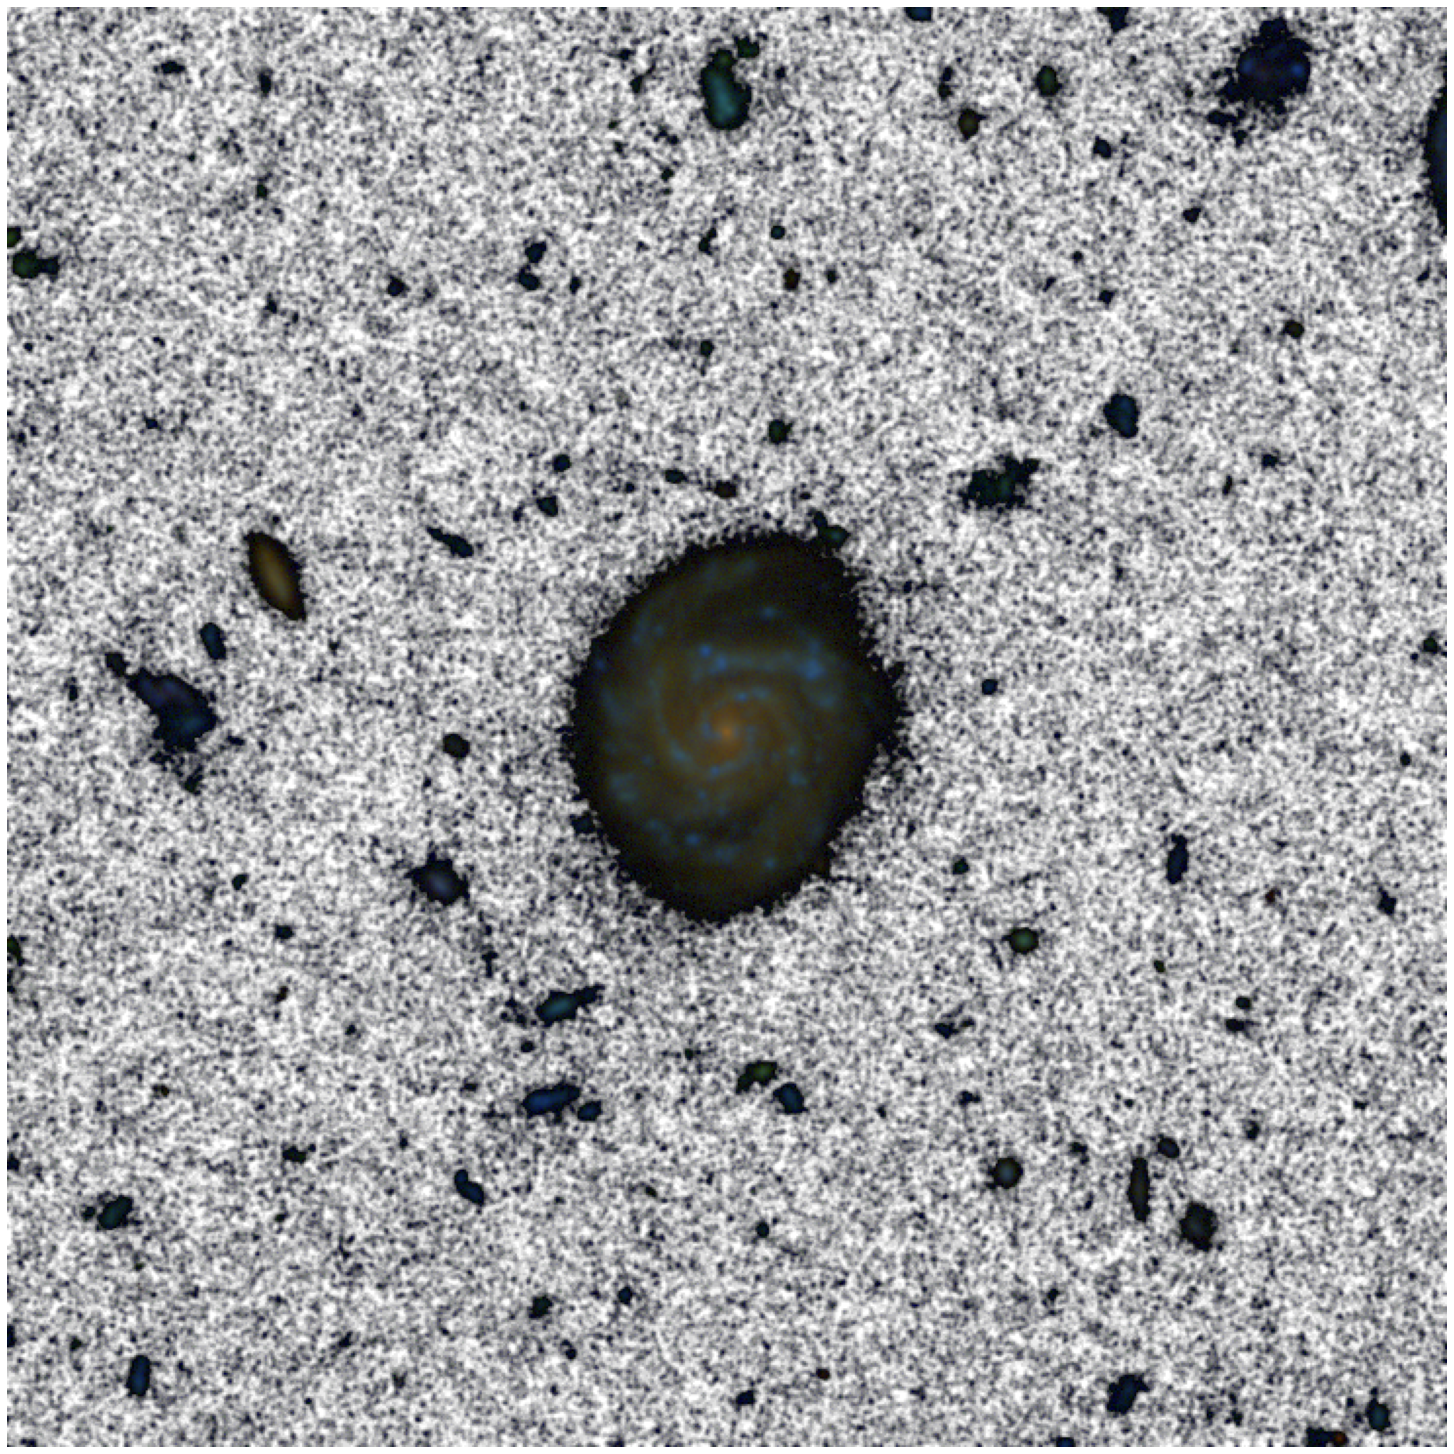

In [35]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
ax = fig.add_subplot(1,1,1)

rgb_alpha = np.stack([rgb_original[:,:,0], 
                      rgb_original[:,:,1], 
                      rgb_original[:,:,2],
                      np.sum(rgb_smoothed, axis=2)*level_of_gray], 
                      axis=2)
ax.imshow(rgb_alpha, origin='lower')
ax.set_axis_off()

## CREATING IMAGES WITH NUMPY + MATPLOTLIB

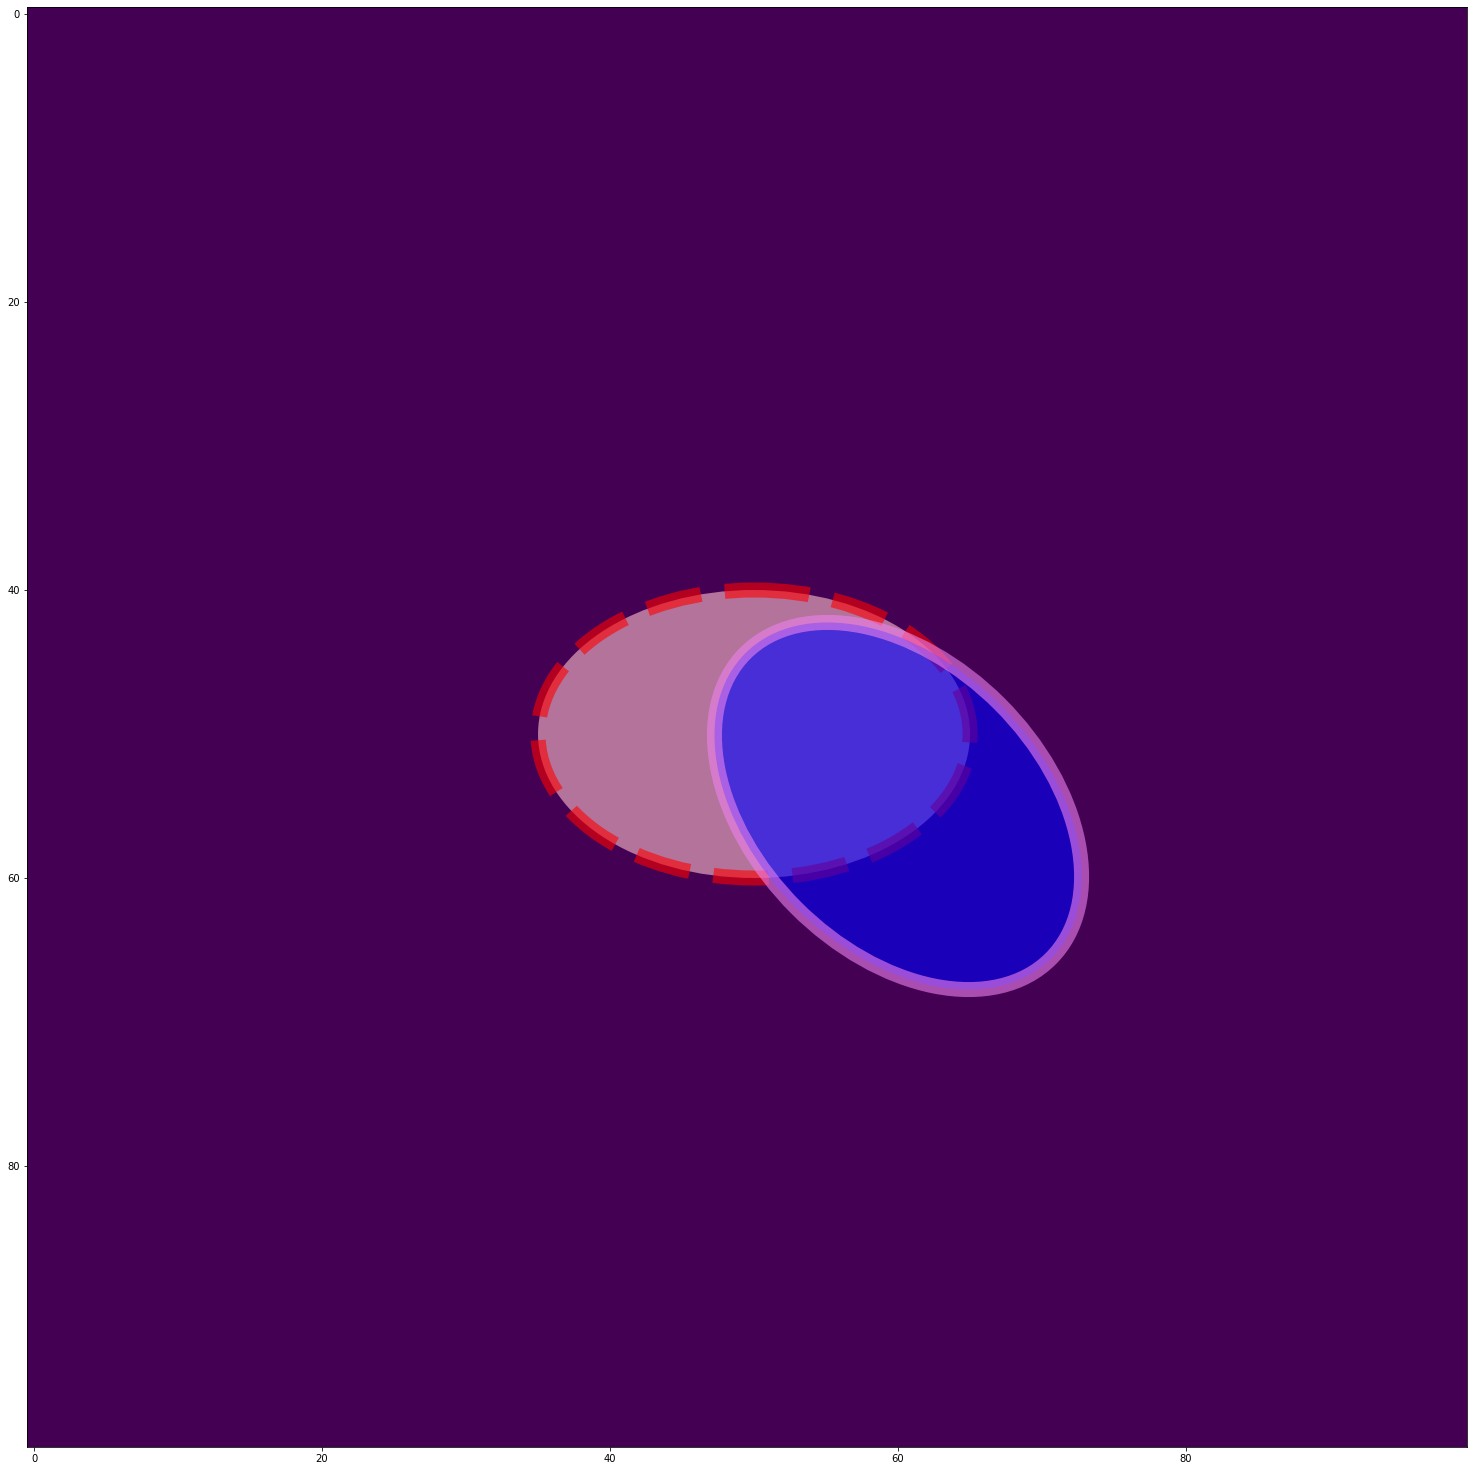

In [7]:
aa = np.zeros(shape=(100,100))
#aa = np.random.normal(0,1,size=(200000))
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
ax = fig.add_subplot(1,1,1)
#ax.hist(aa,bins=50)
#ax.tick_params(labelsize=50)


ellipse_truncation = Ellipse(xy=(50,50), width=30, height=20, angle= 0,\
edgecolor='red', facecolor='pink', linewidth=15, zorder = 2, alpha = 0.6, linestyle = "--")
ax.add_patch(ellipse_truncation)

ellipse_truncation = Ellipse(xy=(60,55), width=30, height=20, angle= 45,\
edgecolor='violet', facecolor='blue', linewidth=15, zorder = 3, alpha = 0.6)
ax.add_patch(ellipse_truncation)

ax.imshow(aa)

## HOW TO USE GNUASTRO

command = "astscript-color-faint-gray image_r_astcrop_aligned.fits image_g_astcrop_aligned.fits image_b_astcrop_aligned.fits -g1 --qbright=" \
                        +str(qbright)+" --stretch="+str(stretch)+" -w="+str(weight_r)+" -w="+str(weight_g)+" -w="+str(weight_b)+ \
                        " -m="+str(min_flux_r)+" -m="+str(min_flux_g)+" -m="+str(min_flux_b)+" --contrast="+str(contrast)+" --output="+output_folder+"gnuastro_color"+str(qbright)+"_"+str(stretch)+".jpg"


## COLOR IMAGE CREATED WITH CHATGPT

Text(0.5, 1.0, 'Imagen RGB combinada')

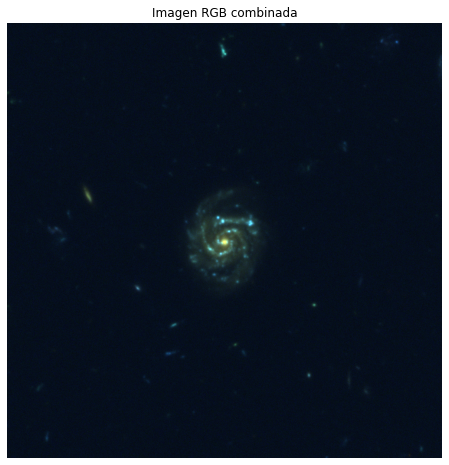

In [8]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

def load_fits_image(path):
    """Carga y normaliza una imagen FITS."""
    data = fits.getdata(path)
    data = np.nan_to_num(data, nan=0.0)  # remplaza NaNs por 0
    return data

def normalize(image, stretch=1.0):
    """Normaliza los datos al rango 0-1 con una opción de stretch."""
    image = image - np.min(image)
    if np.max(image) > 0:
        image = image / np.max(image)
    return np.clip(image * stretch, 0, 1)

def create_rgb_image(red_path, green_path, blue_path, stretch=1.0):
    """Crea una imagen RGB a partir de archivos FITS."""
    r = normalize(load_fits_image(red_path), stretch)
    g = normalize(load_fits_image(green_path), stretch)
    b = normalize(load_fits_image(blue_path), stretch)

    rgb = np.stack([r, g, b], axis=-1)
    return rgb

# === Rutas a tus archivos FITS ===
red_fits   = "17058_goodss_I_hudf.fits"
green_fits = "17058_goodss_V_hudf.fits"
blue_fits  = "17058_goodss_B_hudf.fits"

# === Crear imagen RGB ===
rgb_image = create_rgb_image(red_fits, green_fits, blue_fits, stretch=1.5)

# === Mostrar imagen ===
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.title("Imagen RGB combinada")
